<a href="https://colab.research.google.com/github/cozywind2010/WinthropFinance/blob/master/Efficient_Frontier_Illustration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import numpy as np
import scipy.stats as scs
import statsmodels.api as sm
import pandas as pd
from pylab import mpl, plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [7]:
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [9]:
import os
os.getcwd()

'/content'

In [22]:
raw = pd.read_csv('https://raw.githubusercontent.com/cozywind2010/WinthropFinance/master/tr_eikon_eod_data.csv',
                 index_col=0, parse_dates=True)
raw.head()

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N,SPY,.SPX,.VIX,EUR=,XAU=,GDX,GLD
Date,,,,,,,,,,,,
2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4323,1096.35,NaN,NaN
2010-01-04,30.572827,30.950,20.88,133.90,173.08,113.33,1132.99,20.04,1.4411,1120.00,47.71,109.80
2010-01-05,30.625684,30.960,20.87,134.69,176.14,113.63,1136.52,19.35,1.4368,1118.65,48.17,109.70
2010-01-06,30.138541,30.770,20.80,132.25,174.26,113.71,1137.14,19.16,1.4412,1138.50,49.34,111.51
2010-01-07,30.082827,30.452,20.60,130.00,177.67,114.19,1141.69,19.06,1.4318,1131.90,49.10,110.82


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf367f42e8>,
      dtype=object)

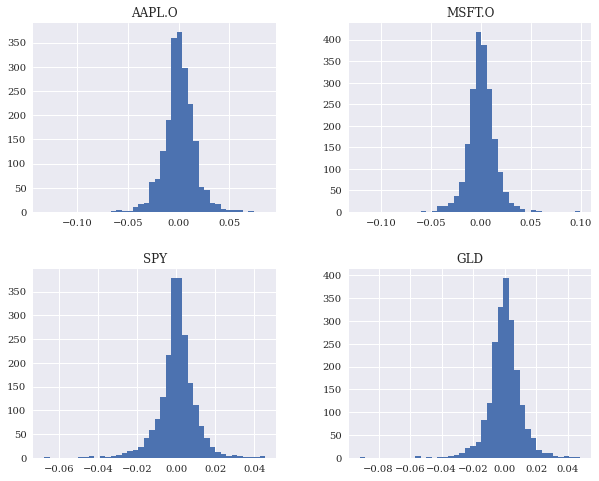

In [13]:
symbols = ['AAPL.O', 'MSFT.O', 'SPY', 'GLD']
noa = len(symbols)
data = raw[symbols]
rets = np.log(data / data.shift(1))
rets.hist(bins=40, figsize=(10, 8)) 

In [14]:
rets.mean() * 252

AAPL.O    0.181303
MSFT.O    0.124840
SPY       0.097286
GLD      -0.003784
dtype: float64

In [15]:
rets.cov() * 252

,AAPL.O,MSFT.O,SPY,GLD
AAPL.O,0.064034,0.023656,0.021154,0.001428
MSFT.O,0.023656,0.051211,0.022390,-0.000370
SPY,0.021154,0.022390,0.022049,0.000108
GLD,0.001428,-0.000370,0.000108,0.025945


In [16]:
weights = np.random.random(noa)  
weights /= np.sum(weights) 
weights

array([0.3479481 , 0.04470443, 0.15122035, 0.45612712])

In [17]:
weights.sum()

1.0

In [18]:
def port_ret(weights):
    return np.sum(rets.mean() * weights) * 252

In [19]:
def port_vol(weights):
    return np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))

In [20]:
prets = []
pvols = []
for p in range (2500):  
    weights = np.random.random(noa)  
    weights /= np.sum(weights)  
    prets.append(port_ret(weights))  
    pvols.append(port_vol(weights))  
prets = np.array(prets)
pvols = np.array(pvols)

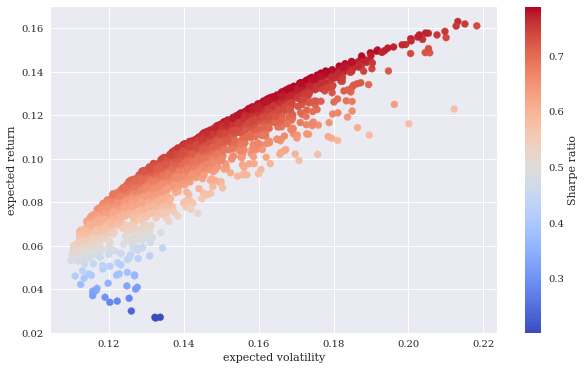

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(pvols, prets, c=prets / pvols,
            marker='o', cmap='coolwarm')
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio');
# plt.savefig('../../images/ch13/stat_12.png')